In [206]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [207]:
# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
city_ride = pd.merge (ride, city, on="city", how='left')
# Display the data table for preview
city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [208]:
# Obtain the x and y coordinates for each of the three city types
numbers = city_ride.groupby(["type", "city"])["ride_id"].count()
numbers = numbers.to_frame()

ave_fare = city_ride.groupby(["type", "city"])["fare"].mean()
ave_fare = ave_fare.to_frame()

ride_data = numbers.join(ave_fare)

In [209]:
# Obtain driver count per city
driver_count = city_ride.groupby(["type", "city"])["driver_count"].value_counts()
driver_count = driver_count.to_frame()
driver_count = driver_count.drop(columns='driver_count').reset_index('driver_count')

# Merge ride data with driver count data
ride_data = ride_data.join(driver_count)

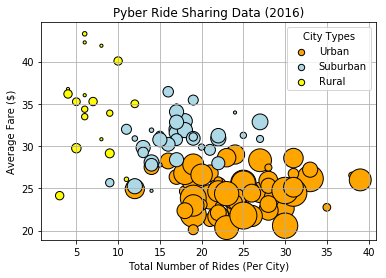

In [224]:
# Build the scatter plots for each city types
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(ride_data.loc['Urban','ride_id'], ride_data.loc['Urban','fare'], alpha=1, c='Orange', edgecolors='black', 
           s=10*ride_data.loc['Urban','driver_count'], label='Urban')
ax.scatter(ride_data.loc['Suburban','ride_id'], ride_data.loc['Suburban','fare'], alpha=1, c='lightblue', edgecolors='black', 
           s=10*ride_data.loc['Suburban','driver_count'], label='Suburban')
ax.scatter(ride_data.loc['Rural','ride_id'], ride_data.loc['Rural','fare'], alpha=1, c='yellow', edgecolors='black', 
           s=10*ride_data.loc['Rural','driver_count'], label='Rural')

# Incorporate the other graph properties
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
lgnd = plt.legend(title='City Types', frameon=True, loc='upper right', )

lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
plt.grid()
# Incorporate a text label regarding circle size

# Save Figure


In [217]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


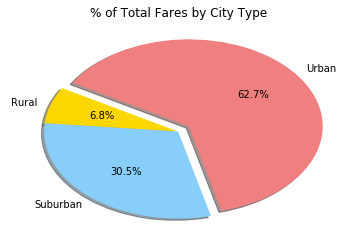

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


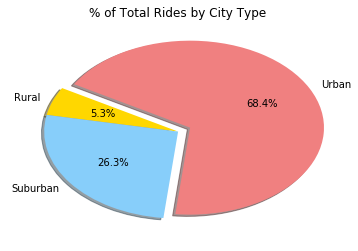

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


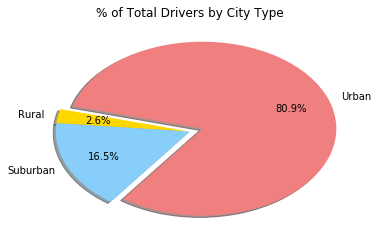

In [6]:
# Show Figure
plt.show()